# TP Support Vector Machine (SVM)

### par Yiting SUN et Yanting LI

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svm_source import frontiere, rand_gauss, rand_bi_gauss, plot_2d

from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
# text.usetex is set as False by default to avoid problems with student computers
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
# sns.axes_style()

### Toy dataset : 2 gaussians

In [28]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

# plt.show()
# plt.close("all")
# plt.ion()
# plt.figure(1, figsize=(15, 5))
# plt.title('First data set')
# plot_2d(X1, y1)

X_train = X1[::2]
Y_train = y1[::2].astype(int)
X_test = X1[1::2]
Y_test = y1[1::2].astype(int)

# fit the model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict labels for the test data base
y_pred = clf.predict(X_test)

# check your score
score = clf.score(X_test, Y_test)
# print('Score : %s' % score)

# display the frontiere
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))

# plt.figure(2)
# frontiere(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

### Iris Dataset
##### Question 1)

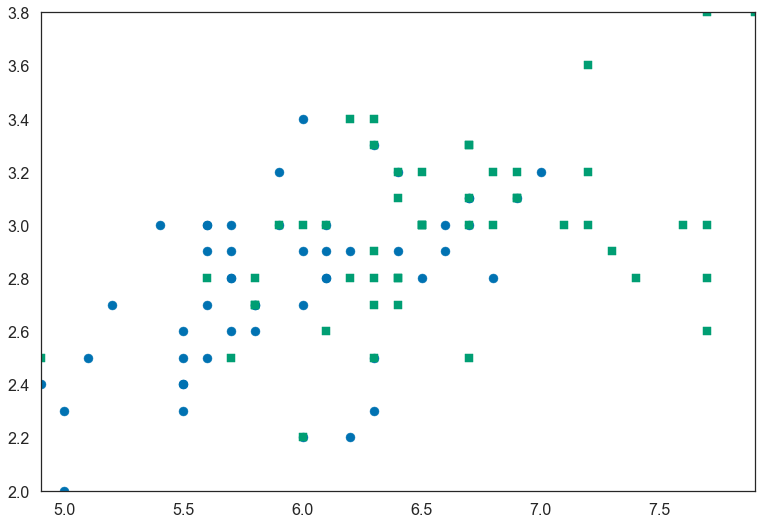

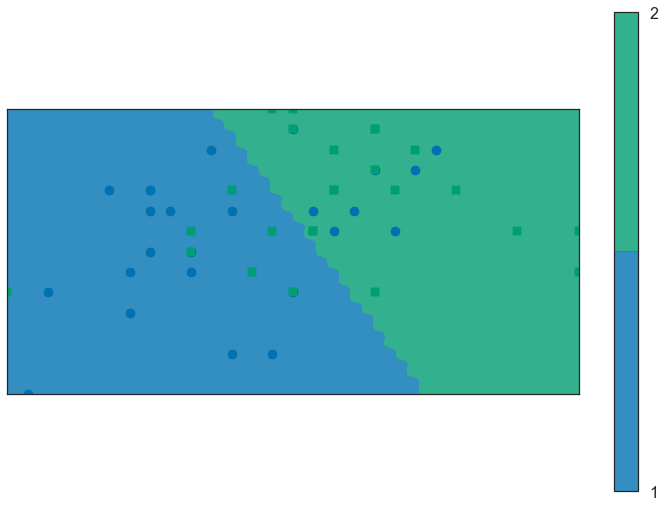

Score : 0.74


In [18]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt

plt.close('all')
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
plt.figure()
plot_2d(X,y)
plt.show()

# split train test
X_train = X[::2]
y_train = y[::2].astype(int)
X_test = X[1::2]
y_test = y[1::2].astype(int)
# print(X_train)
# print(y_train)

# fit the model with linear kernel
clf = SVC(kernel='linear',C=1.0)
clf.fit(X_train,y_train)

#  predict labels for the test database
y_pred = clf.predict(X_test)

# display results using plot_2d and frontiere
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))
plt.figure(2)
# fonctions pour tracer une frontière de décision sur des exemples jouet 2D
frontiere(f, X_train, y_train, w=None, step=50, alpha_choice=1)
plot_2d(X_train,y_train)
plt.show()

# evaluate the performance
score = clf.score(X_test, y_test)
print('Score : %s' %score)

Avec le noyau linéaire, on obtient le 'score' 0.74.

##### Question 2)

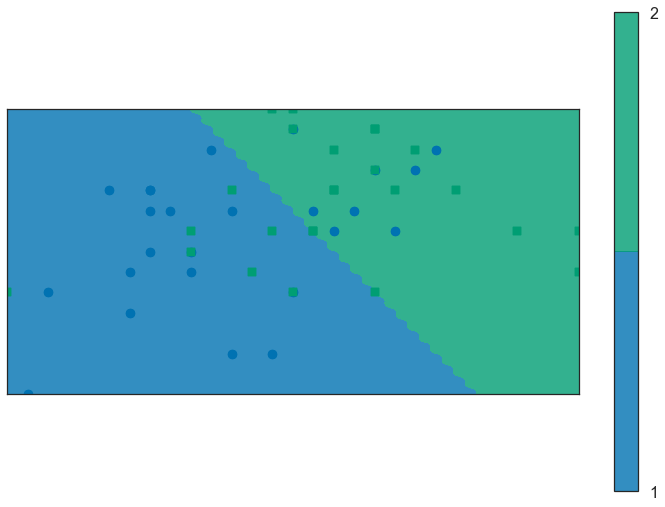

Score : 0.72


In [17]:
# fit the model with polynomial kernel
clf2 = SVC(kernel='poly', C=1.0, degree=3)
clf2.fit(X_train, y_train)

#  predict labels for the test database
y_pred = clf2.predict(X_test)

# display results using plot_2d and frontiere
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf2.predict(xx.reshape(1, -1))
plt.figure(3)
# fonctions pour tracer une frontière de décision sur des exemples jouet 2D
frontiere(f, X_train, y_train, w=None, step=50, alpha_choice=1)
plot_2d(X_train,y_train)
plt.show()

# evaluate the performance
score = clf2.score(X_test, y_test)
print('Score : %s' %score)

Pour la même modèle, le 'score' est 0.72 avec un SVM basé sur noyau polynomial de degrée 3, qui est pas aussi bon que le résultat obtenu avec noyau linéaire.

##### Question 3)
![](Question3.png)

##### Question 4)

*"un SVM minimise l’erreur de classification à l’aide d’un majorant convexe de la fonction qui vaut 1 quand la marge est négative et 0 sinon"*

Pour les modèles qui sont pas "linéairement séparables", on permet quelques erreurs dans le résultat de classification mais on doit absolument contrôler la quantité des mauvais points. Donc on a le problème d'optimisation comme ci-dessous:
\begin{equation}argmin_{\cal {\bf w}\in H,b\in R} \frac{1}{2}\left \| {\bf w} \right \|^{2}+ {\mit C} \sum_{i=1}^{n} {{\scr l}_{0/1}(y_i({\bf w}^T{\bf x}_i+b)-1)} \end{equation}
où ${\scr l}_{0/1}$ est:
$$
{\scr l}_{0/1}(z) = 
\begin{cases}
1, & \text{if $z<0$} \\
0, & \text{otherwise}
\end{cases}
$$

Mais la fonction ${\scr l}_{0/1}$ n'est pas convexe. Pour qu'on puisse faire l'optimization, on change la fonction ${\scr l}_{0/1}$ à la fonction ${\mit Hinge}$, qui est toujours un majorant convexe. Et par contrôler la ${\mit Hinge}$, on peut minimiser l'erreur de classification.

### SVM GUI

1) Dans les figures suivant, on a valeurs 1, 0.002 et 0.001 pour le paramèter C:
![](image_C1.png)
$$C = 1$$
![](image_C002.png)
$$C = 0.002$$
![](image_C001.png)
$$C = 0.001$$

On peut observer que quand la paramètre C est diminué, la classe avec moins de points est plus mal classifié.

2) Pour résoudre ce problème, on utilise la paramètre class_weight="balanced" dans SVC et on obtient le résultat comme ci-dessous:
![](image_class_weight.png)
Avec la paramètre class_weight='balanced', il n'existe plus l'erreur de la classification.

### Face Recognition Task

In [32]:
from time import time
import numpy as np
from sklearn.svm import SVC
import pylab as pl

from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

n_features = lfw_people.data.shape[1]

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()
n_classes = len(target_names)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)
# print(X.shape)
# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] / 2], indices[X.shape[0] / 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
print "Fitting the classifier to the training set"
t0 = time()
# Fit a classifier, 
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

print "Predicting the people names on the testing set"
t0 = time()

# Predict labels for the X_test images
y_pred = clf.predict(X_test)

print "done in %0.3fs" % (time() - t0)
print "Chance level : %s" % max(np.mean(y), 1. - np.mean(y))
print "Accuracy : %s" % clf.score(X_test, y_test)

Total dataset size:
n_samples: 1288
n_features: 30000
n_classes: 7
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.305s
Chance level : 0.621052631579
Accuracy : 0.905263157895


##### Question 5)

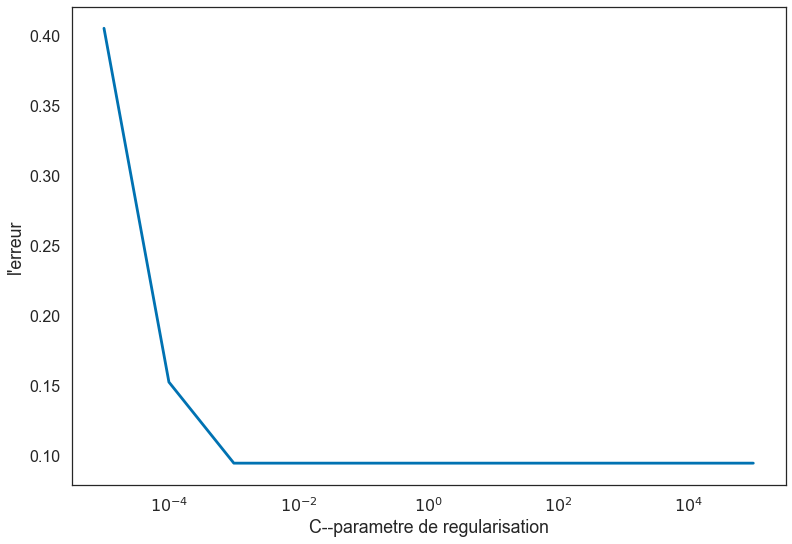

L'erreur va diminuer quand la parametre C augmente.



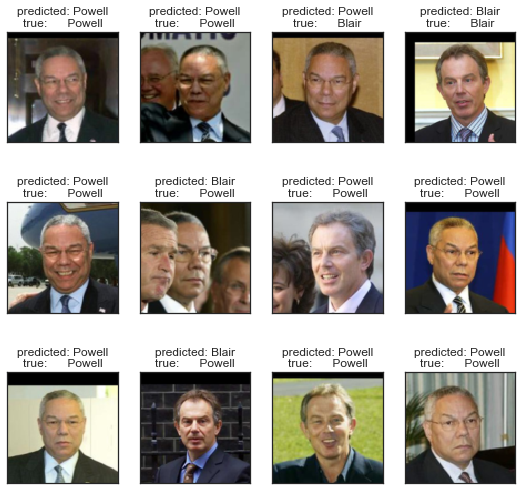

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt

#QUESTION 5 : TODO : try various values for C in the SVC function and plot the error curve
error = []

num =11
C= np.logspace(-5,5,num)
for i in range(0,11):
    clf1 = SVC(kernel='linear', C = C[i])
    clf1.fit(X_train, y_train)
    error.append(1 - clf1.score(X_test, y_test))
    
plt.figure()
plt.plot(C,error)
plt.xlabel("C--parametre de regularisation")
plt.ylabel("l'erreur")
plt.xscale("log")
plt.show()

print("L'erreur va diminuer quand la parametre C augmente.\n")
####################################################################
# Look at the coefficients
# pl.figure()
# pl.imshow(np.reshape(clf.coef_, (h, w)))

####################################################################
# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

##### Question 6)

In [34]:
# Generate the variables de nuisances and add to the original matix X
nuisance = np.random.randn(380,10000)
X_nui = np.hstack((X, nuisance))
# X_nui.shape

indices = np.random.permutation(X_nui.shape[0])
train_idx, test_idx = indices[:X_nui.shape[0] / 2], indices[X_nui.shape[0] / 2:]
X_train_nui, X_test_nui = X_nui[train_idx, :], X_nui[test_idx, :]
y_train_nui, y_test_nui = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
print "Fitting the classifier to the training set"
t0 = time()
# Fit a classifier, 
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train_nui,y_train_nui)

print "Predicting the people names on the testing set"
t0 = time()

# Predict labels for the X_test images
y_pred = clf.predict(X_test_nui)

print "done in %0.3fs" % (time() - t0)
print "Chance level : %s" % max(np.mean(y), 1. - np.mean(y))
print "Accuracy : %s" % clf.score(X_test_nui, y_test_nui)

Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.916s
Chance level : 0.621052631579
Accuracy : 0.857894736842


Compare les deux 'Accuracy', le 'Accuracy' de Question 6) est plus faible qu'avant à cause de la matrice de nuisance ajoutée.

##### Question 7)
Les features sont centrées et réduites par

    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)

Les features doit être centrées et réduites parce qu'il faut permettre les variables avec différentes moyennes et différentes variances. Il aussi diminue l'influence de l'ordre.

#### Question 8)

In [33]:
#QUETSION 8 : TODO : try reducing the dimension using sklearn.decomposition.RandomizedPCA and compute again an SVM classifer.
from sklearn import decomposition

clf_rbf = SVC(kernel='rbf', C=1.0)
clf_rbf.fit(X_train, y_train)
predict = clf_rbf.predict(X_test)
print("Le score avant de faire le PCA est:")
print clf_rbf.score(X_test, y_test)


n_components = 150
pca = decomposition.RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
#eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf_rbf = SVC(kernel='rbf',class_weight='balanced')
clf_rbf.fit(X_train_pca, y_train)
predict = clf_rbf.predict(X_test_pca)

print("Après avoir fait le PCA, le score devient:")
print clf_rbf.score(X_test_pca, y_test)

Le score avant de faire le PCA est:
0.721052631579


/Users/liyanting/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Après avoir fait le PCA, le score devient:
0.905263157895


Avec le noyau non-linéaire RBF, le score est plus faible que le noyau linéaire.
On a amélioré la prédiction par la réduction de dimension de 10000 à 150, et il a résolu le problème de 'overfitting'.

#### Question 9)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# fit the model
Y_train = 2*y_train-1     # transform 0 to -1 in y 
clf = svm.SVC(kernel='linear')    
clf.fit(X_train, Y_train)  

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# pour le problème primal (C=1)
vP = 0.5* np.dot(w.T, w)
for i in range(190):
    middle = 1 - Y_train[i] * (np.dot(w, X_train[i]) + clf.intercept_[0])
    vP = vP + np.amax([middle, 0])
print "Valeur du problème primal: ", vP

# pour le problème dual 
dual_Coef = clf.dual_coef_[0]
alpha = dual_Coef * np.r_[(-1) * np.ones(clf.n_support_[0]), np.ones(clf.n_support_[1])]
vD = np.sum(alpha)

for i in range(len(dual_Coef)):
    for j in range(len(dual_Coef)):
        vD = vD - 0.5 * dual_Coef[i] * dual_Coef[j] * np.dot(clf.support_vectors_[i], clf.support_vectors_[j]) 
print "Valeur du problème dual: ", vD

Valeur du problème primal:  0.0260427132901
Valeur du problème dual:  0.0120866153306


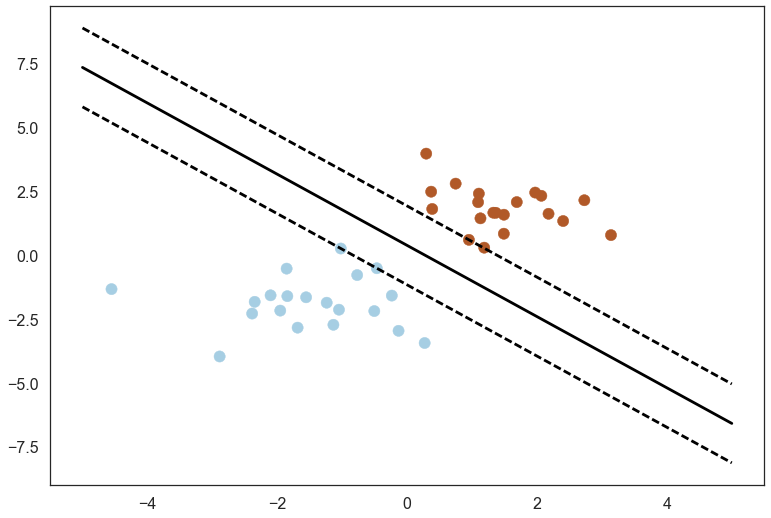

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

#### Question 10)

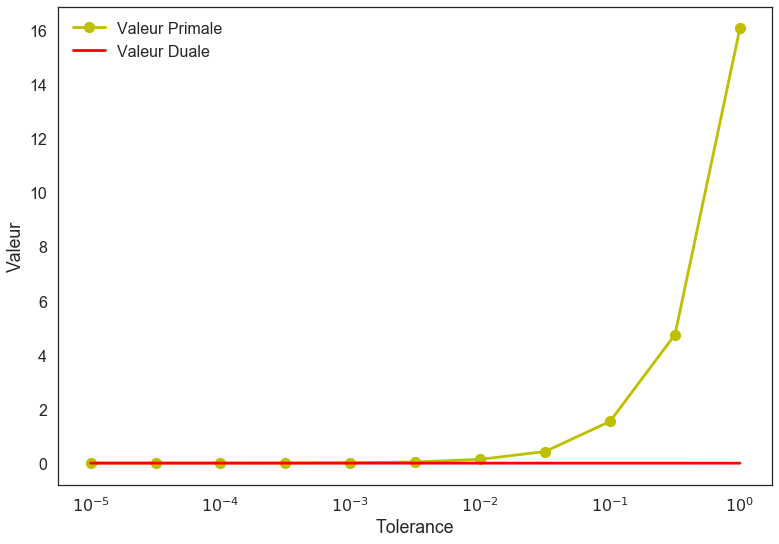

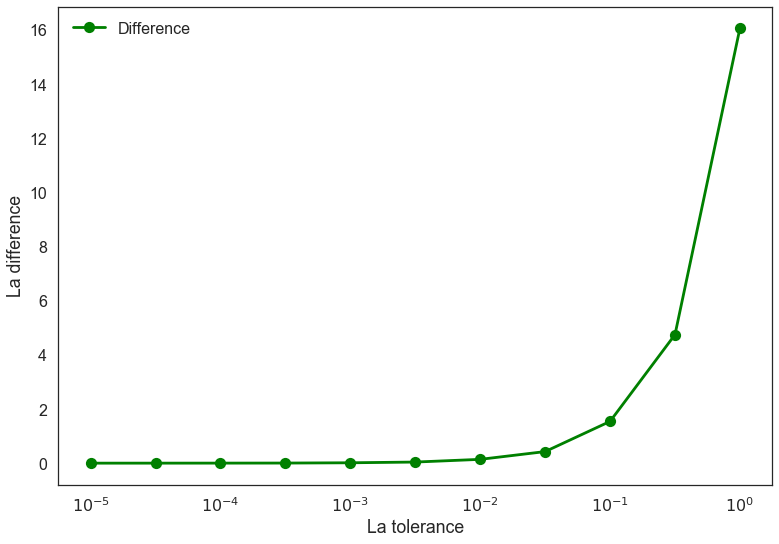

In [36]:
num = 11
tol = np.logspace(-5, 0, num)

vP_List = []
vD_List = []
diff_List = []

for n in range(num):
    clf = svm.SVC(kernel='linear', tol = tol[n])
    clf.fit(X_train, Y_train)
    w = clf.coef_[0]
    
    # pour le problème primal (C=1)
    vP = 0.5* np.dot(w.T, w)
    for i in range(190):
        middle = 1 - Y_train[i] * (np.dot(w, X_train[i]) + clf.intercept_[0])
        vP = vP + np.amax([middle, 0])
    vP_List.append(vP)
   

    # lpour le problème dual
    dualCoef = clf.dual_coef_[0]
    alpha = dualCoef * np.r_[(-1) * np.ones(clf.n_support_[0]), np.ones(clf.n_support_[1])]
    vD = np.sum(alpha)
    for i in range(len(dualCoef)):
        for j in range(len(dualCoef)):
            vD = vD - 0.5 * dualCoef[i] * dualCoef[j] * np.dot(clf.support_vectors_[i], clf.support_vectors_[j])
    vD_List.append(vD)  
    diff_List.append(vP - vD)

plt.figure()
plt.plot(tol, vP_List, 'o-', color="y", label = "Valeur Primale")
plt.plot(tol, vD_List, 'x-', color="r", label = "Valeur Duale")
plt.xscale("log")
plt.xlabel("Tolerance")
plt.ylabel("Valeur")
plt.legend(loc="best")

plt.figure()
plt.plot(tol, diff_List, 'o-', color="g", label = "Difference")
plt.xscale("log")
plt.xlabel("La tolerance")
plt.ylabel("La difference")
plt.legend(loc="best")
plt.show()